## Problem Statement

In the context of public health and safety, particularly during a pandemic, ensuring compliance with mask-wearing regulations is critical. Organizations and public authorities need an automated, accurate solution to monitor and enforce mask usage in public spaces. The goal is to develop a image recognition system using a Convolutional Neural Network (CNN) to identify whether individuals are wearing masks. This system will help businesses and government agencies efficiently enforce mask policies, reduce the spread of infectious diseases, and maintain public safety.

**Importing the Dependencies**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [4]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [5]:
# create the labels

with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [6]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [8]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

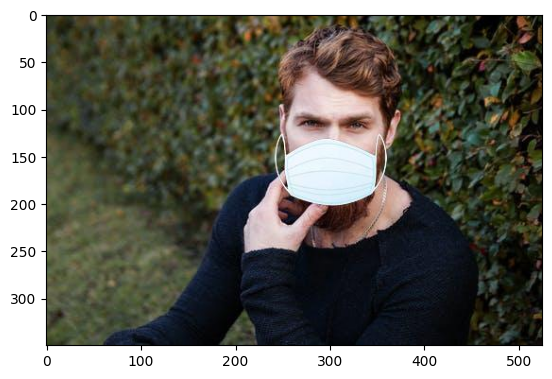

In [9]:
# displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

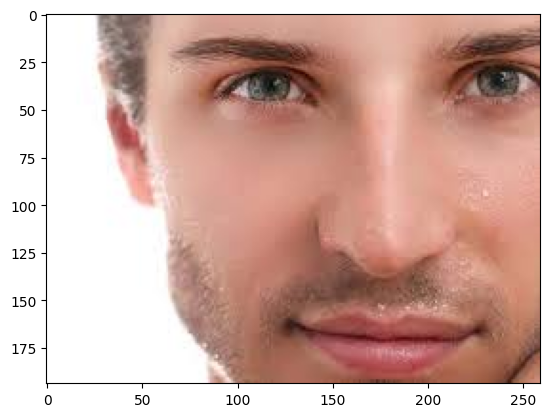

In [10]:
# displaying without mask image
img = mpimg.imread('data/without_mask/without_mask_995.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [11]:
# convert images to numpy arrays+

with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

c:\Users\Anubhav Prasad\anaconda3\envs\py39\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(data)

list

In [13]:
len(data)

7553

In [14]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [15]:
type(data[0])

numpy.ndarray

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [18]:
type(X)

numpy.ndarray

In [19]:
type(Y)

numpy.ndarray

In [20]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [21]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [24]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [25]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [26]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

**Building a Convolutional Neural Networks (CNN)**

In [27]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=3)

Epoch 1/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - acc: 0.7423 - loss: 0.6733 - val_acc: 0.8711 - val_loss: 0.3074
Epoch 2/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - acc: 0.8805 - loss: 0.3175 - val_acc: 0.8893 - val_loss: 0.2648
Epoch 3/3
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - acc: 0.8940 - loss: 0.2680 - val_acc: 0.9355 - val_loss: 0.2221


**Model Evaluation**

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.8999 - loss: 0.2103
Test Accuracy = 0.9099934101104736


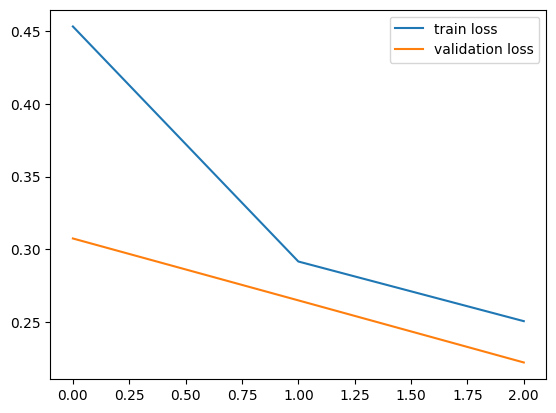

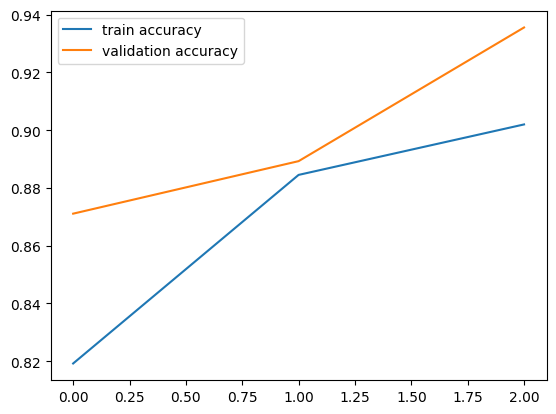

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## Using Lenet Model

In [45]:
# Initialize a Sequential model
lenet_adapted = keras.Sequential()

# First Convolutional Layer
lenet_adapted.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(128,128,3)))
lenet_adapted.add(keras.layers.AveragePooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
lenet_adapted.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
lenet_adapted.add(keras.layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten the output to feed into a fully connected layer
lenet_adapted.add(keras.layers.Flatten())

# First Fully Connected Layer
lenet_adapted.add(keras.layers.Dense(units=120, activation='relu'))

# Second Fully Connected Layer
lenet_adapted.add(keras.layers.Dense(units=84, activation='relu'))

# Output Layer 
lenet_adapted.add(keras.layers.Dense(2, activation='sigmoid'))

In [46]:
# Compile the model
lenet_adapted.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
lenet_adapted.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,046 (6.21 MB)

 Trainable params: 1,628,046 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# training the neural network
history = lenet_adapted.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7141 - loss: 0.6460 - val_accuracy: 0.8876 - val_loss: 0.2633
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8836 - loss: 0.2842 - val_accuracy: 0.9107 - val_loss: 0.2262
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9103 - loss: 0.2200 - val_accuracy: 0.9124 - val_loss: 0.2225
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9329 - loss: 0.1758 - val_accuracy: 0.9223 - val_loss: 0.2214
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9430 - loss: 0.1531 - val_accuracy: 0.9207 - val_loss: 0.2099


In [48]:
loss, accuracy = lenet_adapted.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9230 - loss: 0.1855
Test Accuracy = 0.9238914847373962


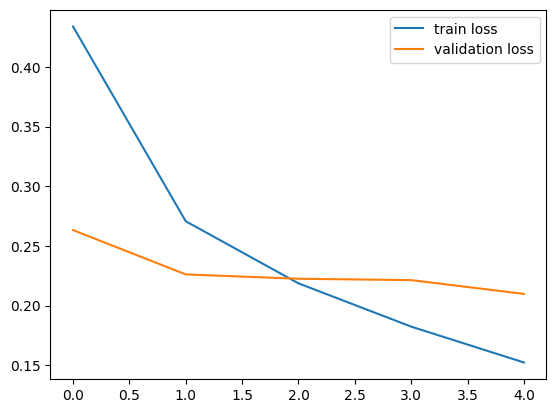

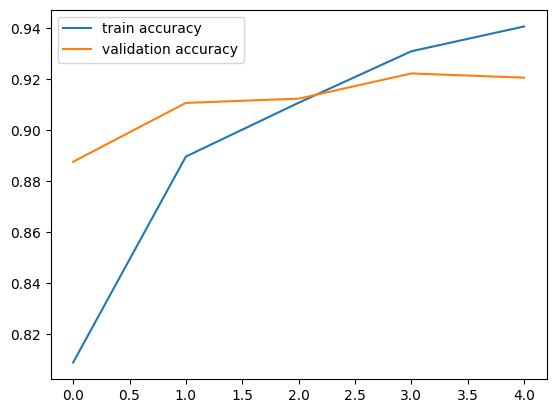

In [49]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

## Predictive System

In [79]:
def predict_mask(input_image_path, models):
    # Load the image
    input_image = mpimg.imread(input_image_path)

    # Display the image
    plt.imshow(input_image)
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

    # Resize the image to the required input size for the models
    input_image_resized = cv2.resize(input_image, (128, 128))

    # Scale the image to the range [0, 1]
    input_image_scaled = input_image_resized / 255.0

    # Reshape the image to match the model's input shape [1, 128, 128, 3]
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Initialize a list to store predictions from each model
    predictions = []

    # Loop over each model and make predictions
    for model in models:
        input_prediction = model.predict(input_image_reshaped)
        predictions.append(input_prediction)
        print(input_prediction)

    # Average the predictions
    avg_prediction = np.mean(predictions, axis=0)

    # Get the predicted label
    input_pred_label = np.argmax(avg_prediction)

    # Interpret the result
    if input_pred_label == 1:
        result = 'The person in the image is wearing a mask'
    else:
        result = 'The person in the image is not wearing a mask'

    return result

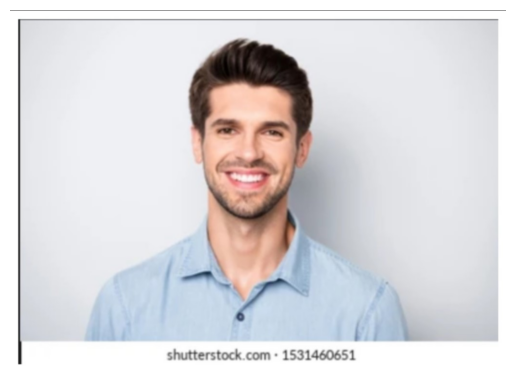

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.57403886 0.48640558]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.87559134 0.56188285]]


'The person in the image is not wearing a mask'

In [80]:
predict_mask('test_image3.jpg', [model, lenet_adapted])

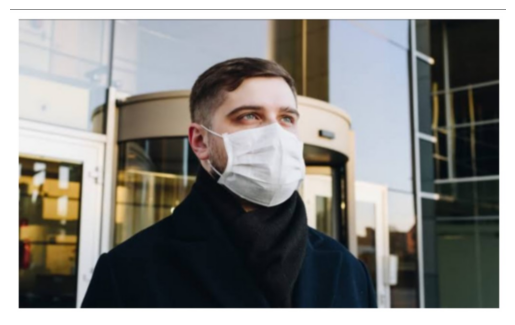

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.2309849 0.9268826]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.29159635 0.9847784 ]]


'The person in the image is wearing a mask'

In [81]:
predict_mask('test_image2.jpg', [model, lenet_adapted])

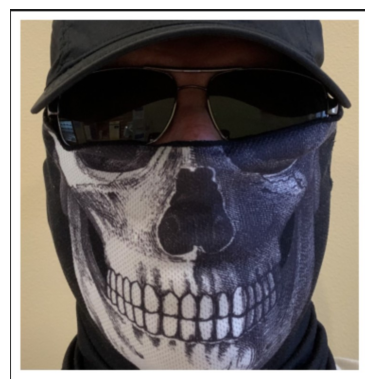

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.31792408 0.82858145]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.451498  0.8900858]]


'The person in the image is wearing a mask'

In [82]:
predict_mask('test_image1.jpg', [model, lenet_adapted])